In [66]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [67]:
In [2]: features, true_labels = make_blobs(
   ...:     n_samples=200,
   ...:     centers=3,
   ...:     cluster_std=2.75,
   ...:     random_state=42
   ...: )

In [68]:
In [5]: scaler = StandardScaler()
   ...: scaled_features = scaler.fit_transform(features)

In [69]:
In [6]: scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [70]:
In [13]: kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
n=10
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, n+1):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)

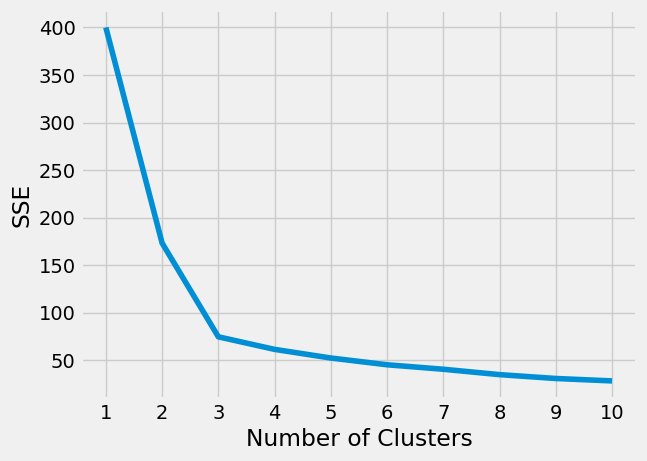

In [71]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [72]:
In [15]: kl = KneeLocator(
   ...:     range(1, n+1), sse, curve="convex", direction="decreasing"
   ...: )

In [16]: kl.elbow

3

In [73]:
kmeans = KMeans(n_clusters=3)

In [74]:
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [77]:
labels = kmeans.labels_
print("Cluster labels:", len(labels))

Cluster labels: 200


In [78]:
print(len(scaled_features))

200


In [79]:
centers = kmeans.cluster_centers_
print("Cluster centers:", centers)

Cluster centers: [[-0.25813925  1.05589975]
 [ 1.19539276  0.13158148]
 [-0.91941183 -1.18551732]]


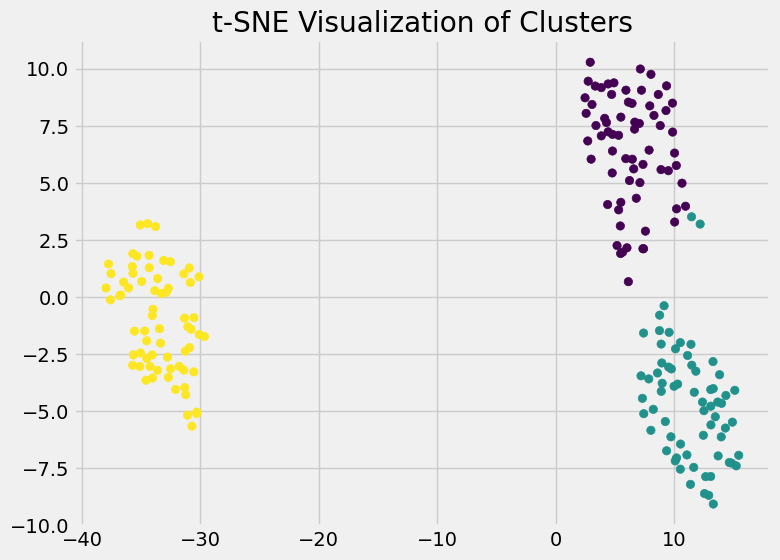

In [82]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Clusters')
plt.show()